Introduction

The Charge-Coupled Device (CCD) has an important role in the field of astronomy. Observatories utilize high caliber CCDs, and similar technology is found in smart phones. However, due to the types of observations astronomers make (such as low light levels and complex backgrounds), small defects make it difficult to conduct precision photometry and astrometry.

In this lab, we learned how to measure the calibration of the read noise, gain, linearity, and dark current of a CCD. Through these experiments, we were able to observe the difficulty in conducting precision photometry in a real world simulation. 


Theory


Measuring Read Noise:

Using bias frames, the read noise can be measured by calculating the mean and standard deviation of the pixel values.  The standard deviation is a measure of the fluctuations of the data around the average value.  It is the square root of the average of the squared deviations from the mean. To attain an even more precise answer, one can create a "master bias" frame from all the bias frames by stacking all of the bias frames averaging them together. Next, subtract an individual bias image from the master bias image and observe the the standard deviation. This is one estimate of the read noise in ADU. Repeat this for each of the individual bias images and average the numbers. The resulting value is the read noise in ADU. Multiply that number by the system gain and the resulting value is the read noise in e-/ADU. 



Measuring Gain:

The system gain of a camera is the conversion rate between the raw numbers you get out
of the camera (ADU) and actual electrons. It gives one an idea of the number of
electrons that can be recorded (an estimate of the full-well capacity).
The gain is measured by using several points to estimate a line. Firstly,
the variance is calculated. Secondly, for flats at each light level, the mean is computed across
the whole image. Next, linear regression analysis is used to investigate the mean variance plot. During this process, one can observe outliers that are the result of errors in processing or image capture
process, or from hitting the saturation point of the CCD. It is clear in the mean variance plot that saturation may be an issue.



Dark Current:

This is accomplished by measuring the mean of a bias frame and subtracting that from the mean of a dark frame. This is
noted as electrons per second, so divide this by the number of seconds in the interval to get e-/second. 





Experiment and Methodology








In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
%matplotlib inline



from glob import glob

bias = []
for b in glob('/Users/alexandra/Documents/Umich/Courses/F17/ASTRO361/lab4/lab4_frames/bias*'):
        bias.append(fits.getdata(b,ext=0).astype(np.int))


101.958815215
10.1958815215


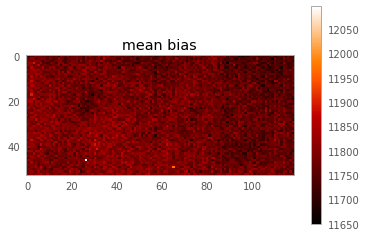

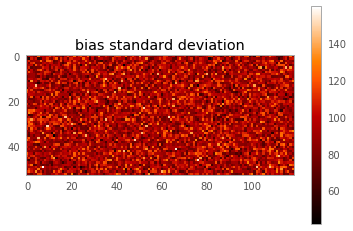

In [50]:
# Read Noise


# Measure the shape of your arrays (they are all the same)
height, width = bias[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr = np.zeros((height, width)) # initialize containers for data storage
std_arr = np.zeros((height, width))  # ditto

for h in range(height):
    for w in range(width):
        pix_values = [arr[h,w] for arr in bias] # This fancy code is called
        # a list comprehension.  You can read more about it here:
        # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        pix_values = np.array(pix_values) # convert list to an array
        mean_arr[h,w] = pix_values.mean()
        std_arr[h,w] = pix_values.std()

master_bias = (mean_arr[h,w]) # master bias frame/avg of all the bias frames
std_diff = (std_arr[h,w]) # equiv. to ((master_bias - pix_values).std())
print(std_diff)

rn_adu = (std_diff/10) # read noise in ADU (averaged together the std devs of the differences)
print(rn_adu)

# Plot arrays for fun
plt.imshow(mean_arr)
plt.colorbar()
plt.title("mean bias")
plt.grid(False)
plt.show()
plt.imshow(std_arr)
plt.colorbar()
plt.title("bias standard deviation")
plt.grid(False)
plt.show()

0.0


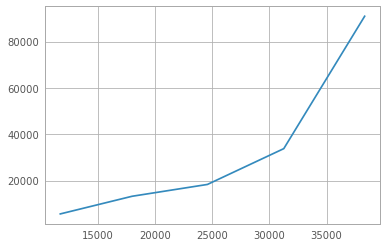

In [108]:
# Gain

# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 



from glob import glob

expo_01 = []
for b in glob('/Users/alexandra/Documents/Umich/Courses/F17/ASTRO361/lab4/lab4_frames/expo_0.1.000*'):
        expo_01.append(fits.getdata(b,ext=0).astype(np.int))


         
expo_03 = []
for b in glob('/Users/alexandra/Documents/Umich/Courses/F17/ASTRO361/lab4/lab4_frames/expo_0.3.000*'):
        expo_03.append(fits.getdata(b,ext=0).astype(np.int))

        

expo_05 = []
for b in glob('/Users/alexandra/Documents/Umich/Courses/F17/ASTRO361/lab4/lab4_frames/expo_0.5.000*'):
        expo_05.append(fits.getdata(b,ext=0).astype(np.int))

        

expo_07 = []
for b in glob('/Users/alexandra/Documents/Umich/Courses/F17/ASTRO361/lab4/lab4_frames/expo_0.7.000*'):
        expo_07.append(fits.getdata(b,ext=0).astype(np.int))


        
expo_09 = []
for b in glob('/Users/alexandra/Documents/Umich/Courses/F17/ASTRO361/lab4/lab4_frames/expo_0.9.000*'):
        expo_09.append(fits.getdata(b,ext=0).astype(np.int))



# Measure the shape of your arrays (they are all the same)
height01, width01 = expo_01[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr01 = np.zeros((height01, width01)) # initialize containers for data storage
std_arr01 = np.zeros((height01, width01))  # ditto

for h in range(height01):
    for w in range(width01):
        pix_values01 = [arr[h,w] for arr in expo_01] # This fancy code is called
        # a list comprehension.  You can read more about it here:
        # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        pix_values01 = np.array(pix_values01) # convert list to an array
        mean_arr01[h,w] = pix_values01.mean()
        std_arr01[h,w] = pix_values01.std()

        
        
# Measure the shape of your arrays (they are all the same)
height03, width03 = expo_03[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr03 = np.zeros((height03, width03)) # initialize containers for data storage
std_arr03 = np.zeros((height03, width03))  # ditto

for h in range(height03):
    for w in range(width03):
        pix_values03 = [arr[h,w] for arr in expo_03] # This fancy code is called
        # a list comprehension.  You can read more about it here:
        # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        pix_values03 = np.array(pix_values03) # convert list to an array
        mean_arr03[h,w] = pix_values03.mean()
        std_arr03[h,w] = pix_values03.std()
        

               
# Measure the shape of your arrays (they are all the same)
height05, width05 = expo_05[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr05 = np.zeros((height05, width05)) # initialize containers for data storage
std_arr05 = np.zeros((height05, width05))  # ditto

for h in range(height05):
    for w in range(width05):
        pix_values05 = [arr[h,w] for arr in expo_05] # This fancy code is called
        # a list comprehension.  You can read more about it here:
        # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        pix_values05 = np.array(pix_values05) # convert list to an array
        mean_arr05[h,w] = pix_values05.mean()
        std_arr05[h,w] = pix_values05.std()
        
    
    
# Measure the shape of your arrays (they are all the same)
height07, width07 = expo_07[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr07 = np.zeros((height07, width07)) # initialize containers for data storage
std_arr07 = np.zeros((height07, width07))  # ditto

for h in range(height07):
    for w in range(width07):
        pix_values07 = [arr[h,w] for arr in expo_07] # This fancy code is called
        # a list comprehension.  You can read more about it here:
        # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        pix_values07 = np.array(pix_values07) # convert list to an array
        mean_arr07[h,w] = pix_values07.mean()
        std_arr07[h,w] = pix_values07.std()
    
    
    
# Measure the shape of your arrays (they are all the same)
height09, width09 = expo_09[0].shape

# Make pixel-wise mean and standard deviation arrays
mean_arr09 = np.zeros((height09, width09)) # initialize containers for data storage
std_arr09 = np.zeros((height09, width09))  # ditto

for h in range(height09):
    for w in range(width09):
        pix_values09 = [arr[h,w] for arr in expo_09] # This fancy code is called
        # a list comprehension.  You can read more about it here:
        # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        pix_values09 = np.array(pix_values09) # convert list to an array
        mean_arr09[h,w] = pix_values09.mean()
        std_arr09[h,w] = pix_values09.std()
          

            
sd01 = (std_arr01[h,w])
sd03 = (std_arr03[h,w])
sd05 = (std_arr05[h,w])
sd07 = (std_arr07[h,w])
sd09 = (std_arr09[h,w])
  
avg01 = (mean_arr01[h,w])
avg03 = (mean_arr03[h,w])
avg05 = (mean_arr05[h,w])
avg07 = (mean_arr07[h,w])
avg09 = (mean_arr09[h,w])

var01 = ((std_arr01[h,w])**2)
var03 = ((std_arr03[h,w])**2)
var05 = ((std_arr05[h,w])**2)
var07 = ((std_arr07[h,w])**2)
var09 = ((std_arr09[h,w])**2)

x01 = (avg01/var01)
x03 = (avg03/var03)
x05 = (avg05/var05)
x07 = (avg07/var07)
x09 = (avg09/var09)

#mean of 5 frames
mean = ((pix_values01+pix_values03+pix_values05+pix_values07+pix_values09).mean())

xvals = (avg01,avg03,avg05,avg07,avg09)
yvals = (var01,var03,var05,var07,var09)

plt.plot(xvals,yvals)


## the gain is the slope of the line in mean variance plot

Conclusions

This lab covered how to analyze a camera's electronics to see what might lie deep in the
noise, and how it can affect a final image.